In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import attila_utils

In [2]:
treatments = {
    'A': 'Amiloride',
    'B': 'HCQ',
    'C': 'HCQ nano',
    'D': 'Saline',
    'E': 'R-HCQ',
    'F': 'S-HCQ',
    'G': 'TUDCA',
    'H': 'Saline WT',
    'I': 'TUDCA WT',
    'J': 'DMSO WT',
}

In [3]:
fpath = '../../resources/QPS/5xFAD-mouse/CO28152_NFL-GFAP_datasum.xlsx'
nfl_invivo = pd.read_excel(fpath, sheet_name='NFL in vivo clean')
#nfl_invivo = nfl_invivo.melt(id_vars=['Cohort', 'Group', 'IRN', 'Sex', 'Genotype'], value_name='NF-L')
#nfl_invivo['Week'] = nfl_invivo.variable.str.replace('NF-L week ', '').astype(int)
nfl_invivo['IRN'] = nfl_invivo.IRN.astype('str')
nfl_invivo['Sex'] = pd.Categorical(nfl_invivo['Sex'], categories=['m', 'f'], ordered=True)
nfl_invivo['NF-L week 0-4 change'] = nfl_invivo.apply(lambda r: r.loc['NF-L week 4'] / r.loc['NF-L week 0'], axis=1)
nfl_invivo['NF-L week 0-8 change'] = nfl_invivo.apply(lambda r: r.loc['NF-L week 8'] / r.loc['NF-L week 0'], axis=1)
nfl_invivo['NF-L week 0-12 change'] = nfl_invivo.apply(lambda r: r.loc['NF-L week 12'] / r.loc['NF-L week 0'], axis=1)
data = nfl_invivo[['Group', 'Sex', 'Genotype', 'NF-L week 0-4 change', 'NF-L week 0-8 change', 'NF-L week 0-12 change']]
data = pd.concat([data, data.Group.apply(lambda g: treatments[g]).to_frame('Treatment')], axis=1)
data.head()

,Group,Sex,Genotype,NF-L week 0-4 change,NF-L week 0-8 change,NF-L week 0-12 change,Treatment
0,A,f,tg/wt,1.494792,1.314236,1.192708,Amiloride
1,A,f,tg/wt,1.492837,1.121777,0.922636,Amiloride
2,A,f,tg/wt,1.547789,0.965763,1.088445,Amiloride
3,A,f,tg/wt,1.236934,1.198606,1.790941,Amiloride
4,A,m,tg/wt,1.920962,1.295533,1.505155,Amiloride


In [4]:
value_vars = ['NF-L week 0-4 change', 'NF-L week 0-8 change', 'NF-L week 0-12 change']
id_vars = ['Group', 'Sex', 'Genotype', 'Treatment']
datalong = data.melt(value_vars=value_vars, id_vars=id_vars, value_name='NF-L change', var_name='Duration')
datalong['Duration'] = datalong.Duration.str.replace('NF-L ', '').str.replace(' change', '')
datalong

,Group,Sex,Genotype,Treatment,Duration,NF-L change
0,A,f,tg/wt,Amiloride,week 0-4,1.494792
1,A,f,tg/wt,Amiloride,week 0-4,1.492837
2,A,f,tg/wt,Amiloride,week 0-4,1.547789
3,A,f,tg/wt,Amiloride,week 0-4,1.236934
4,A,m,tg/wt,Amiloride,week 0-4,1.920962
...,...,...,...,...,...,...
172,J,f,wt/wt,DMSO WT,week 0-12,1.200000
173,J,f,wt/wt,DMSO WT,week 0-12,1.296296
174,J,m,wt/wt,DMSO WT,week 0-12,0.685714
175,J,m,wt/wt,DMSO WT,week 0-12,1.128205


/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

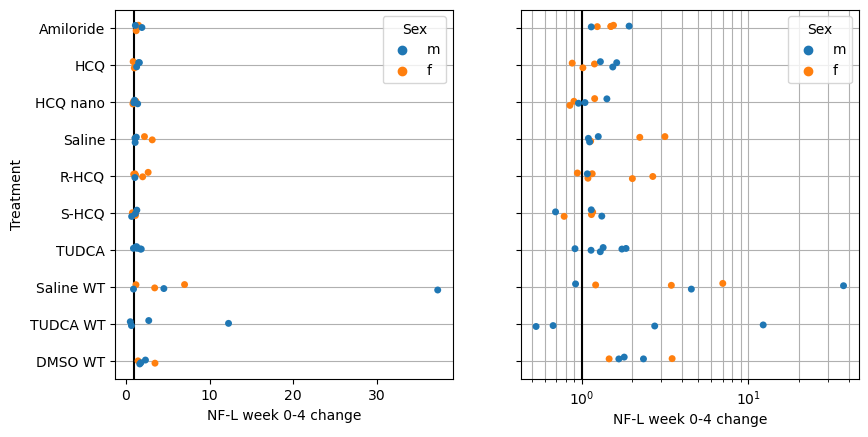

In [5]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(9.6, 4.8))
for axi in ax:
    axi.axvline(1, color='k')
    sns.stripplot(data=data, x='NF-L week 0-4 change', y='Treatment', hue='Sex', ax=axi)
    axi.grid(axis='y')

ax[1].grid(axis='x', which='both')
ax[1].set_xscale('log')

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

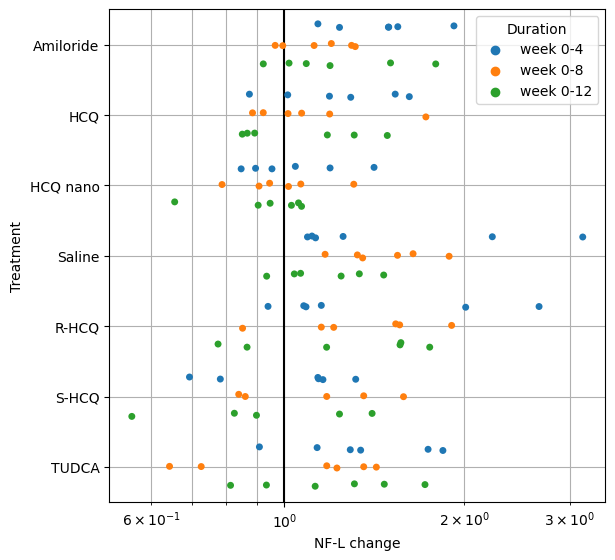

In [6]:
fig, ax = plt.subplots(figsize=(6.4, 6.4))
ax.axvline(1, color='k')
sns.stripplot(data=datalong.loc[~ datalong.Treatment.isin(['Saline WT', 'TUDCA WT', 'DMSO WT'])], x='NF-L change', y='Treatment', hue='Duration', dodge=True, ax=ax)
ax.grid(axis='x', which='both')
ax.grid(axis='y')
ax.set_xscale('log')

/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/jonesa7/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstan

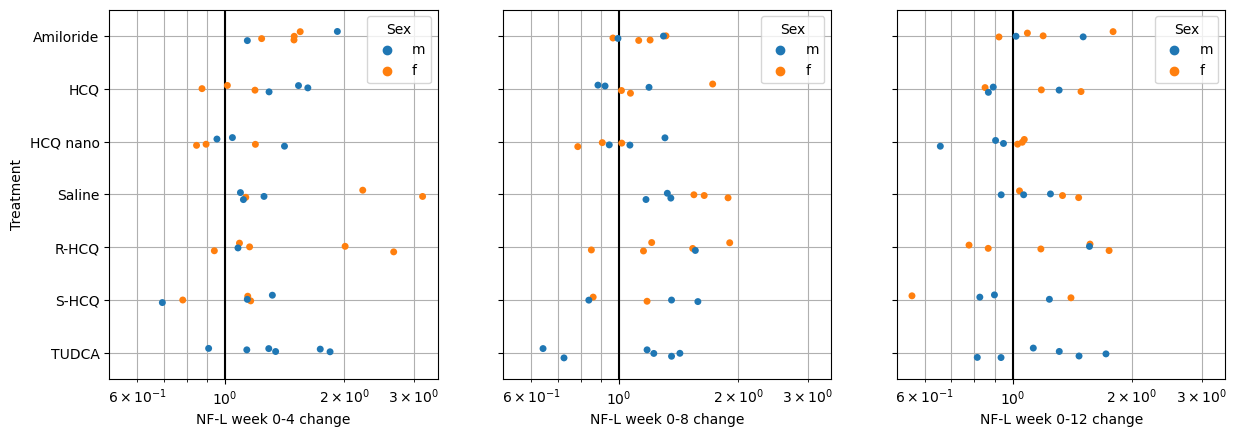

In [7]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(14.4, 4.8))
for axi, x in zip(ax, ['NF-L week 0-4 change', 'NF-L week 0-8 change', 'NF-L week 0-12 change']):
    axi.axvline(1, color='k')
    sns.stripplot(data=data.loc[~ data.Treatment.isin(['Saline WT', 'TUDCA WT', 'DMSO WT'])], x=x, y='Treatment', hue='Sex', ax=axi)
    axi.set_xscale('log')
    axi.grid(axis='x', which='both')
    axi.grid(axis='y')


In [8]:
%connect_info

{
  "shell_port": 64386,
  "iopub_port": 64387,
  "stdin_port": 64388,
  "control_port": 64390,
  "hb_port": 64389,
  "ip": "127.0.0.1",
  "key": "e7d58a3c-17461596053f7b080759fe67",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": "python3"
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-d4619992-2667-4549-8128-87366449d66e.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
